In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### EDA

In [5]:
df.shape

(4898, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# Number of missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Correlation between the different columns
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [10]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

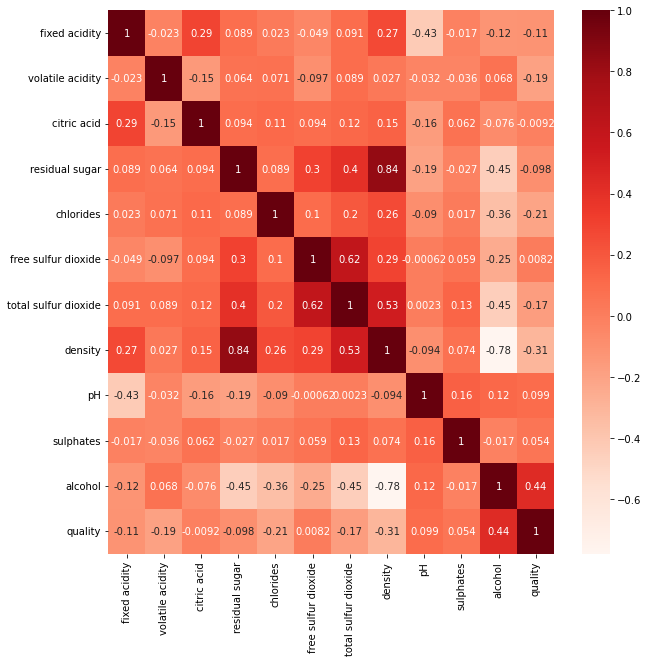

In [14]:
# Visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.show()

How quality changes as alcohol changes.

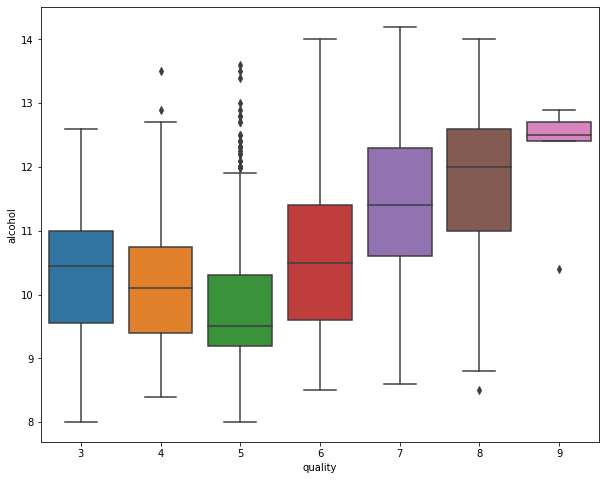

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x="quality", y="alcohol")
plt.show()

How quality changes as sulphate changes.

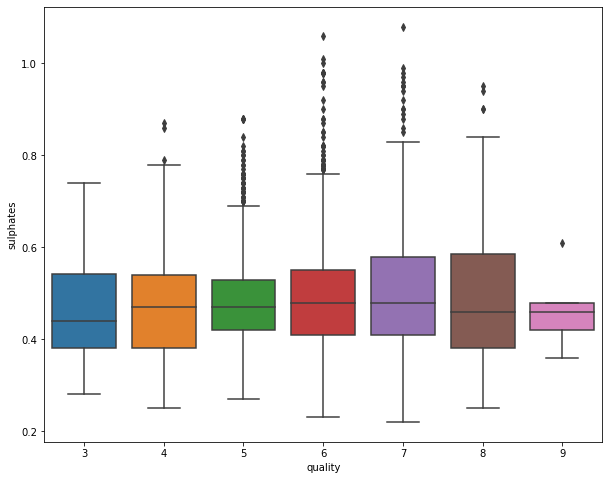

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x="quality", y="sulphates")
plt.show()

### Predictions
#### Using `KNN`

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Random seed
np.random.seed(42)

steps = [("scaler", StandardScaler()),
        ("knn", KNN(n_neighbors=5))]

# Initiate the pipeline
pipe = Pipeline(steps)

# Create and split data
X = df.drop(["quality", "sulphates", "free sulfur dioxide", "citric acid", "residual sugar"], axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initiate and fit our model using the pipeline
knn = pipe.fit(X_train, y_train)

# Score
knn.score(X_test, y_test)

0.5387755102040817

**Evaluating our model**

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = knn.predict(X_test)
print(y_pred[:5])

# Confusion matrix
confusion_matrix(y_test, y_pred)

[6 7 7 5 7]


array([[  0,   0,   6,   1,   0,   0],
       [  0,   5,  19,  13,   3,   0],
       [  0,  19, 251, 142,  14,   0],
       [  0,  13, 173, 417,  63,   2],
       [  0,   3,  29, 128, 116,   4],
       [  0,   0,   0,  23,  23,   3]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.12      0.12      0.12        40
           5       0.53      0.59      0.56       426
           6       0.58      0.62      0.60       668
           7       0.53      0.41      0.46       280
           8       0.33      0.06      0.10        49

    accuracy                           0.54      1470
   macro avg       0.35      0.30      0.31      1470
weighted avg       0.53      0.54      0.53      1470



C:\Users\ronni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ronni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ronni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Improving the model using `GridSearchCV`**

In [40]:
from sklearn.model_selection import GridSearchCV, KFold

np.random.seed(42)

# Instantiate KFold
kf = KFold(n_splits=5, shuffle=True)

# Grid to tune
param_grid = {
    "knn__n_neighbors": np.arange(1,30)
}

# Instantiate our GSCV model
knn_g = GridSearchCV(knn, param_grid, cv=kf) 

# Fit it
knn_g.fit(X_train, y_train);

In [41]:
# Best parameters
knn_g.best_params_

{'knn__n_neighbors': 1}

In [42]:
# Best score
knn_g.best_score_

0.5875163329148135